In [593]:
import numpy as np
from pandas import DataFrame
import pandas
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib

In [594]:
# load data

df_all_unsmooth = pandas.read_csv('Dropbox/uni_koeln/ltc1_biomechanics/assignment1/pos_vel_acc_unsmoothed_xy.txt', sep='\t').drop(axis=1, labels='Unnamed: 114')
df_all_smooth = pandas.read_csv('Dropbox/uni_koeln/ltc1_biomechanics/assignment1/pos_vel_acc_smoothed_xy.txt', sep='\t')
df_all_smooth_lowpass3 = pandas.read_csv('Dropbox/uni_koeln/ltc1_biomechanics/assignment1/pva_all_smooth_lowpass3.txt', sep='\t')
df_all_smooth_lowpass10 = pandas.read_csv('Dropbox/uni_koeln/ltc1_biomechanics/assignment1/pva_all_smooth_lowpass10.txt', sep='\t')

df_angular_unsmooth = pandas.read_csv('Dropbox/uni_koeln/ltc1_biomechanics/assignment1/angle_unsmoothed.txt', sep='\t')
df_angular_smooth = pandas.read_csv('Dropbox/uni_koeln/ltc1_biomechanics/assignment1/angle_smooth.txt', sep='\t')
df_angular_smooth_lowpass3 = pandas.read_csv('Dropbox/uni_koeln/ltc1_biomechanics/assignment1/angle_smooth_lowpass3.txt', sep='\t')
df_angular_smooth_lowpass10 = pandas.read_csv('Dropbox/uni_koeln/ltc1_biomechanics/assignment1/angle_smooth_lowpass10.txt', sep='\t')


In [595]:
Y = range(223,248)

df_all_unsmooth.index = Y
df_all_smooth.index = Y
df_all_smooth_lowpass3.index = Y
df_all_smooth_lowpass10.index = Y

df_angular_unsmooth.index = Y
df_angular_smooth.index = Y
df_angular_smooth_lowpass3.index = Y
df_angular_smooth_lowpass10.index = Y

In [596]:
# examplary plot
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

def add_hlines(ax1):
    vert_lines = [[228, 'td'],
                  [241, 'to']]
    for v in vert_lines:
        ax1.axvline(v[0], color='purple', label=v[1])
    yl = plt.ylim()
    ypos = yl[0] + .05*(yl[1]-yl[0])
    ax1.text(x=228.2, y=ypos, s='TD', color='purple')
    ax1.text(x=241.2, y=ypos, s='TO', color='purple')

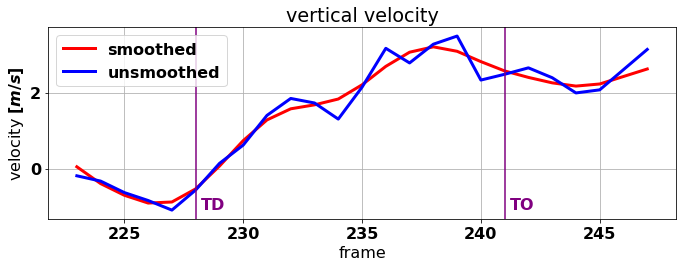

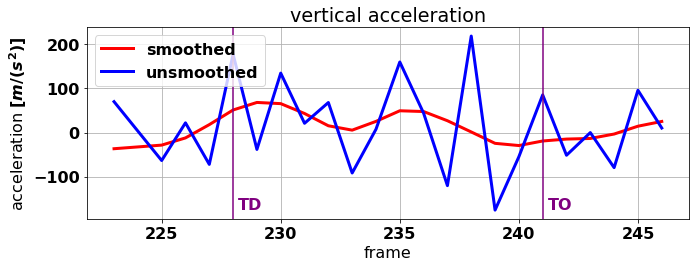

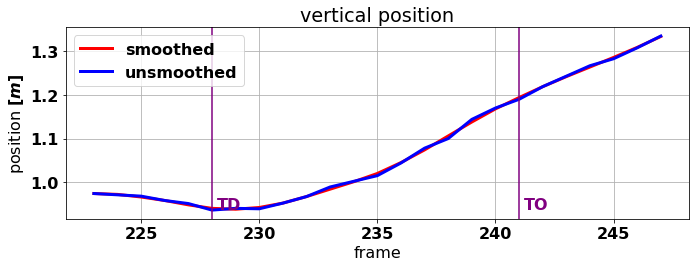

In [598]:
kwargs = {'linewidth': 3}

plt.figure(figsize=(10, 4))
plt.plot(Y, df_all_smooth['CG - Y vel'], color='red', label='smoothed', **kwargs)
plt.plot(Y, df_all_unsmooth['CG - Y vel'], color='blue', label='unsmoothed', **kwargs)
plt.ylabel('velocity $[m/s]$')
plt.xlabel('frame')
plt.grid('on')
plt.legend(loc='upper left')
add_hlines(plt)
plt.title('vertical velocity')
plt.tight_layout()
plt.savefig('Dropbox/uni_koeln/ltc1_biomechanics/assignment1/plots/speed_y.png')


plt.figure(figsize=(10, 4))
plt.plot(Y[:-1], df_all_smooth['CG - Y acl'][:-1], color='red', label='smoothed', **kwargs)
plt.plot(Y[:-1], df_all_unsmooth['CG - Y acl'][:-1], color='blue', label='unsmoothed', **kwargs)
plt.ylabel('acceleration $[m/(s^2)]$')
plt.xlabel('frame')
plt.grid('on')
plt.legend(loc='upper left')
add_hlines(plt)
plt.title('vertical acceleration')
plt.tight_layout()
plt.savefig('Dropbox/uni_koeln/ltc1_biomechanics/assignment1/plots/acceleration_y.png')

plt.figure(figsize=(10, 4))
plt.plot(Y, df_all_smooth['CG - Y pos'], color='red', label='smoothed', **kwargs)
plt.plot(Y, df_all_unsmooth['CG - Y pos'], color='blue', label='unsmoothed', **kwargs)
plt.ylabel('position $[m]$')
plt.xlabel('frame')
plt.grid('on')
plt.legend(loc='upper left')
add_hlines(plt)
plt.title('vertical position')
plt.tight_layout()
plt.savefig('Dropbox/uni_koeln/ltc1_biomechanics/assignment1/plots/pos_y.png')

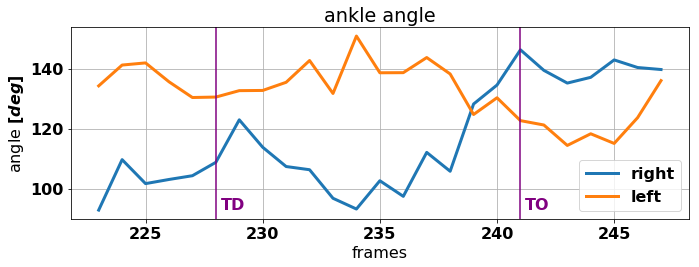

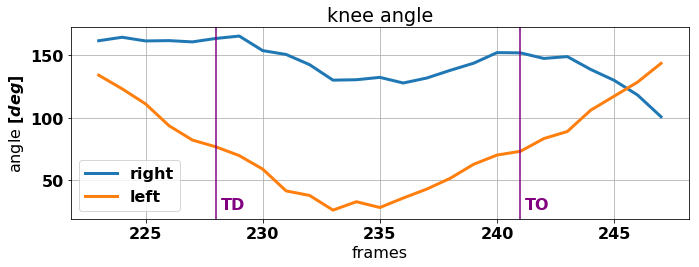

In [581]:
plt.figure(figsize=(10, 4))
plt.plot(Y, df_angular_unsmooth['Ankle Angle Z']-360, label='right', **kwargs)
plt.plot(Y, df_angular_unsmooth['Ankle Angle Z.1'], label='left', **kwargs)
plt.legend()
plt.ylabel('angle $[deg]$')
plt.title('ankle angle')
plt.grid('on')
plt.xlabel('frames')
add_hlines(plt)
plt.tight_layout()
plt.savefig('Dropbox/uni_koeln/ltc1_biomechanics/assignment1/plots/ankle_angle.png')

plt.figure(figsize=(10, 4))
plt.plot(Y, 360-df_angular_unsmooth['Knee Angle Z'], label='right', **kwargs)
plt.plot(Y, 360-df_angular_unsmooth['Knee Angle Z.1'], label='left', **kwargs)
plt.legend()
plt.ylabel('angle $[deg]$')
plt.title('knee angle')
plt.grid('on')
plt.xlabel('frames')
add_hlines(plt)
plt.tight_layout()
plt.savefig('Dropbox/uni_koeln/ltc1_biomechanics/assignment1/plots/knee_angle.png')

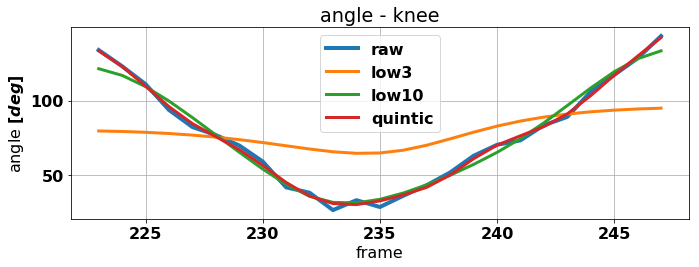

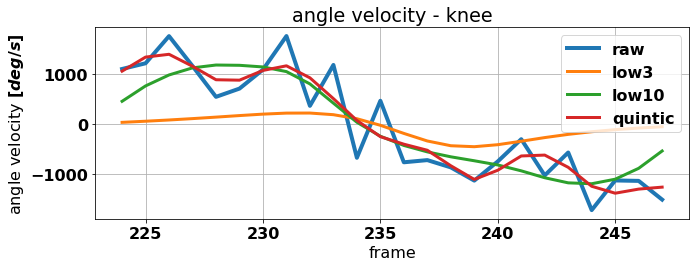

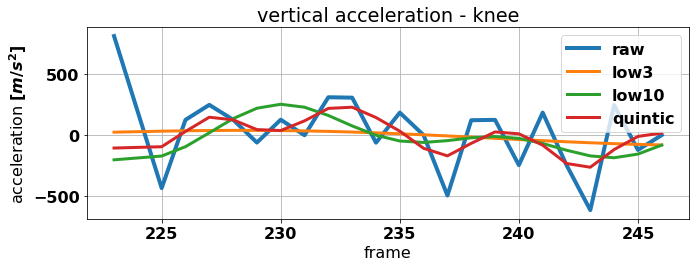

In [585]:
# angle, left knee
plt.figure(figsize=(10,4))
plt.title('angle - knee')
plt.plot(Y, 360-df_angular_unsmooth['Knee Angle Z.1'], label='raw', linewidth=4)
plt.plot(Y, 360-df_angular_smooth_lowpass3['Knee Angle Z.1'], label='low3', **kwargs)
plt.plot(Y, 360-df_angular_smooth_lowpass10['Knee Angle Z.1'], label='low10', **kwargs)
plt.plot(Y, 360-df_angular_smooth['Knee Angle Z.1'], label='quintic', **kwargs)
plt.ylabel('angle $[deg]$')
plt.legend()
plt.grid('on')
plt.xlabel('frame')
plt.tight_layout()
plt.savefig('Dropbox/uni_koeln/ltc1_biomechanics/assignment1/plots/filter_angle.png')

# angle velocity, left knee
plt.figure(figsize=(10,4))
plt.title('angle velocity - knee')
degs = np.array(df_angular_unsmooth['Knee Angle Z.1'])
degs_low3 = np.array(df_angular_smooth_lowpass3['Knee Angle Z.1'])
degs_cubic = np.array(df_angular_smooth['Knee Angle Z.1'])
degs_low10 = np.array(df_angular_smooth_lowpass10['Knee Angle Z.1'])
plt.plot(Y[1:], (degs[1:] - degs[:-1])*100, label='raw', linewidth=4)
plt.plot(Y[1:], (degs_low3[1:] - degs_low3[:-1])*100, label='low3', **kwargs)
plt.plot(Y[1:], (degs_low10[1:] - degs_low10[:-1])*100, label='low10', **kwargs)
plt.plot(Y[1:], (degs_cubic[1:] - degs_cubic[:-1])*100, label='quintic', **kwargs)
plt.legend()
plt.grid('on')
plt.xlabel('frame')
plt.ylabel('angle velocity $[deg/s]$')
plt.tight_layout()
plt.savefig('Dropbox/uni_koeln/ltc1_biomechanics/assignment1/plots/filter_angle_velo.png')

# acceleration, right knee
plt.figure(figsize=(10,4))
plt.title('vertical acceleration - knee')
plt.plot(Y[:-1], df_all_unsmooth['Knee - Y acl.1'][:-1], label='raw', linewidth=4)
plt.plot(Y[:-1], df_all_smooth_lowpass3['Knee - Y acl.1'][:-1], label='low3', **kwargs)
plt.plot(Y[:-1], df_all_smooth_lowpass10['Knee - Y acl.1'][:-1], label='low10', **kwargs)
plt.plot(Y[:-1], df_all_smooth['Knee - Y acl.1'][:-1], label='quintic', **kwargs)
plt.ylabel('acceleration $[m/s^2]$')
plt.legend()
plt.grid('on')
plt.xlabel('frame')
plt.tight_layout()
plt.savefig('Dropbox/uni_koeln/ltc1_biomechanics/assignment1/plots/filter_acc.png')

xdiff 0.4970000000000001
1. velocity 9.94


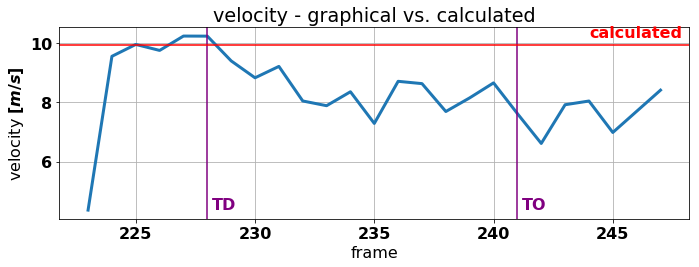

In [591]:
##
# 5. Berechnen sie folgende parameter
##
# 1. Anlaufgeschwindigkeit
# from start of sequence till touchdown. take time diff and x distance.
touchdown_frame = 228
first_frame = 223
x_start = df_all_unsmooth['CG - X pos'][first_frame]
x_touchdown = df_all_unsmooth['CG - X pos'][touchdown_frame]
x_diff = x_touchdown - x_start
print 'xdiff', x_diff
time_diff = (touchdown_frame - first_frame)/100.

plt.figure(figsize=(10,4))
velocity = x_diff / time_diff
print '1. velocity %.2f'%velocity
plt.plot(Y, df_all_unsmooth['CG - X vel'], **kwargs)
plt.grid('on')
add_hlines(plt)
plt.axhline(velocity, color='red')
plt.text(244, 10.2, 'calculated', color='red')
plt.xlabel('frame')
plt.title('velocity - graphical vs. calculated')
plt.ylabel('velocity $[m/s]$')
plt.tight_layout()
plt.savefig('Dropbox/uni_koeln/ltc1_biomechanics/assignment1/plots/vel_calc.png')

In [592]:
# 3. Vertikale, horizontale und resultierende Absprunggeschwindigkeit
takeoff_frame = 241
vel_horizontal = (df_all_unsmooth['CG - X pos'][takeoff_frame+1] - df_all_unsmooth['CG - X pos'][takeoff_frame-1])*100/2.
vel_vertical = (df_all_unsmooth['CG - Y pos'][takeoff_frame+1] - df_all_unsmooth['CG - Y pos'][takeoff_frame-1])*100/2.
vel_overall = np.sqrt(vel_horizontal**2 + vel_vertical**2)
print '3.'
print 'horizontal velocity %.2f m/s'%vel_horizontal
print 'vertical velocity %.2f m/s'%vel_vertical
print 'overall velocity %.2f m/s'%vel_overall
print 

# 2. Verlust der horizontalen Geschwindigkeit waehrend Absprung
print '2.'
print 'loss of velocity: %.2f m/s'%(velocity - vel_horizontal)
print 

# 4.
print '4.'
take_off_angle = np.arctan(vel_vertical/vel_horizontal)*180/np.pi
print 'takeoff angle: %.2f'%take_off_angle
print

print '6.'
touchdown_frame_idx = list(df_angular_unsmooth.index).index(touchdown_frame)
take_off_idx = list(df_angular_unsmooth.index).index(takeoff_frame)
knee_min = np.min((360-df_angular_unsmooth['Knee Angle Z'][touchdown_frame_idx:take_off_idx]))
knee_min_left = np.min((360-df_angular_unsmooth['Knee Angle Z.1'][touchdown_frame_idx:take_off_idx]))
print 'minimum right knee angle: %2.f deg'%knee_min
print 'minimum right knee angle: %2.f deg'%knee_min_left
print

print '5.'
angle_of_attack_frame = 229
y_diff = np.abs(df_all_unsmooth['Toe - Y pos'][angle_of_attack_frame] - df_all_unsmooth['CG - Y pos'][angle_of_attack_frame])
x_diff = np.abs(df_all_unsmooth['Toe - X pos'][angle_of_attack_frame] - df_all_unsmooth['CG - X pos'][angle_of_attack_frame])
angle_of_attack = np.arctan(y_diff/x_diff)*180/np.pi
print 'angle of attack: %.2f deg'%angle_of_attack
print 

print '8.'
contact_time = (takeoff_frame - touchdown_frame)/100.
print 'contact time: %.2fs'%contact_time

3.
horizontal velocity 7.60 m/s
vertical velocity 2.45 m/s
overall velocity 7.99 m/s

2.
loss of velocity: 2.34 m/s

4.
takeoff angle: 17.87

6.
minimum right knee angle: 128 deg
minimum right knee angle: 26 deg

5.
angle of attack: 57.42 deg

8.
contact time: 0.13s


In [541]:
v = list(df_all_unsmooth.index).index(takeoff_frame)
print 
loc = np.array(df_all_unsmooth['CG - X pos'][v:]) 
vel = (loc[2:] - loc[:-2])*50
acc = (vel[2:] - vel[:-2])*50
mean_x_vel = np.mean(vel)
mean_x_acc = np.mean(acc)

loc = np.array(df_all_unsmooth['CG - Y pos'][v:]) 
vel = (loc[2:] - loc[:-2])*50
acc = (vel[2:] - vel[:-2])*50
mean_y_vel = np.mean(vel)
mean_y_acc = np.mean(acc)
print mean_x_acc, mean_y_acc
print mean_x_vel, mean_y_vel
#df_all_unsmooth['CG - Y pos'][v:]


3.333333333332965 -6.666666666666857
7.450000000000001 2.34
